In [1]:
import jsonlines
import pandas as pd

In [2]:
detailed_results_path = 'results/detailed_model_results_Corsair_224_20241201.jsonl'

In [3]:
with jsonlines.open(detailed_results_path) as reader:
    data = list(reader)

In [4]:
# Normalize the nested 'Results' into separate records
records = []
for run in data:
    model = run["Model"]
    run_num = run["Run"]
    timestamp = run.get("Timestamp", "")
    for pathology_result in run["Results"]:
        record = {
            "Model": model,
            "Run": run_num,
            "Timestamp": timestamp,
            "Pathology": pathology_result["Pathology"],
            "Validation AUC": pathology_result["Validation AUC"],
            "Test AUC": pathology_result["Test AUC"],
            "Validation Predictions": pathology_result["Validation Predictions"],
            "Validation Actuals": pathology_result["Validation Actuals"],
            "Test Predictions": pathology_result["Test Predictions"],
            "Test Actuals": pathology_result["Test Actuals"],
        }
        records.append(record)

# Create DataFrame
df = pd.DataFrame(records)

# Display the first few rows
print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
     Model  Run            Timestamp      Pathology  Validation AUC  Test AUC  \
0  alexnet    1  2024-12-01 14:55:06    Atelectasis        0.725399  0.651579   
1  alexnet    1  2024-12-01 14:55:06   Cardiomegaly        0.721301  0.660355   
2  alexnet    1  2024-12-01 14:55:06  Consolidation        0.727598  0.642762   
3  alexnet    1  2024-12-01 14:55:06          Edema        0.848560  0.738030   
4  alexnet    1  2024-12-01 14:55:06       Effusion        0.768915  0.682560   

                              Validation Predictions  \
0  [0.04258567467331886, 0.07346360385417938, 0.0...   
1  [0.008060683496296406, 0.011337797157466412, 0...   
2  [0.016491547226905823, 0.02521398290991783, 0....   
3  [0.004507928621023893, 0.015633350238204002, 0...   
4  [0.06547753512859344, 0.10262077301740646, 0.1...   

                                  Validation Actuals  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [5]:
# Display basic information about the DataFrame
print("\nDataFrame Information:")
print(df.info())

# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display unique models and pathologies
print("\nUnique Models:", df["Model"].unique())
print("Unique Pathologies:", df["Pathology"].unique())

# Count of runs per model
print("\nRuns per Model:")
print(df.groupby("Model")["Run"].nunique())

# Count of runs per model and pathology
print("\nRuns per Model and Pathology:")
print(df.groupby(["Model", "Pathology"]).size().unstack(fill_value=0))
df


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model                   14 non-null     object 
 1   Run                     14 non-null     int64  
 2   Timestamp               14 non-null     object 
 3   Pathology               14 non-null     object 
 4   Validation AUC          14 non-null     float64
 5   Test AUC                14 non-null     float64
 6   Validation Predictions  14 non-null     object 
 7   Validation Actuals      14 non-null     object 
 8   Test Predictions        14 non-null     object 
 9   Test Actuals            14 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.2+ KB
None

Summary Statistics:
        Run  Validation AUC   Test AUC
count  14.0       14.000000  14.000000
mean    1.0        0.687549   0.639662
std     0.0        0.070639   0.

,Model,Run,Timestamp,Pathology,Validation AUC,Test AUC,Validation Predictions,Validation Actuals,Test Predictions,Test Actuals
0,alexnet,1,2024-12-01 14:55:06,Atelectasis,0.725399,0.651579,"[0.04258567467331886, 0.07346360385417938, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1427334100008011, 0.05239570513367653, 0.09...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,alexnet,1,2024-12-01 14:55:06,Cardiomegaly,0.721301,0.660355,"[0.008060683496296406, 0.011337797157466412, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.02346615307033062, 0.009823727421462536, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,alexnet,1,2024-12-01 14:55:06,Consolidation,0.727598,0.642762,"[0.016491547226905823, 0.02521398290991783, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.030989188700914383, 0.017718970775604248, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,alexnet,1,2024-12-01 14:55:06,Edema,0.848560,0.738030,"[0.004507928621023893, 0.015633350238204002, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.010564176365733147, 0.0061813583597540855, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,alexnet,1,2024-12-01 14:55:06,Effusion,0.768915,0.682560,"[0.06547753512859344, 0.10262077301740646, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.20714741945266724, 0.07689143717288971, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,alexnet,1,2024-12-01 14:55:06,Emphysema,0.607667,0.623413,"[0.011838401667773724, 0.015540546737611294, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.03398958221077919, 0.02193727344274521, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,alexnet,1,2024-12-01 14:55:06,Fibrosis,0.657182,0.675385,"[0.013894563540816307, 0.012682773172855377, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.040476102381944656, 0.022314053028821945, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,alexnet,1,2024-12-01 14:55:06,Hernia,0.739864,0.682642,"[0.0005176409031264484, 0.0005812847521156073,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0030647481326013803, 0.0007680997368879616,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ..."
8,alexnet,1,2024-12-01 14:55:06,Infiltration,0.630073,0.635254,"[0.13844063878059387, 0.14512085914611816, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[0.17144854366779327, 0.13175256550312042, 0.1...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,alexnet,1,2024-12-01 14:55:06,Mass,0.615608,0.548502,"[0.03655749931931496, 0.039620157331228256, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0716555118560791, 0.04405292496085167, 0.05...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


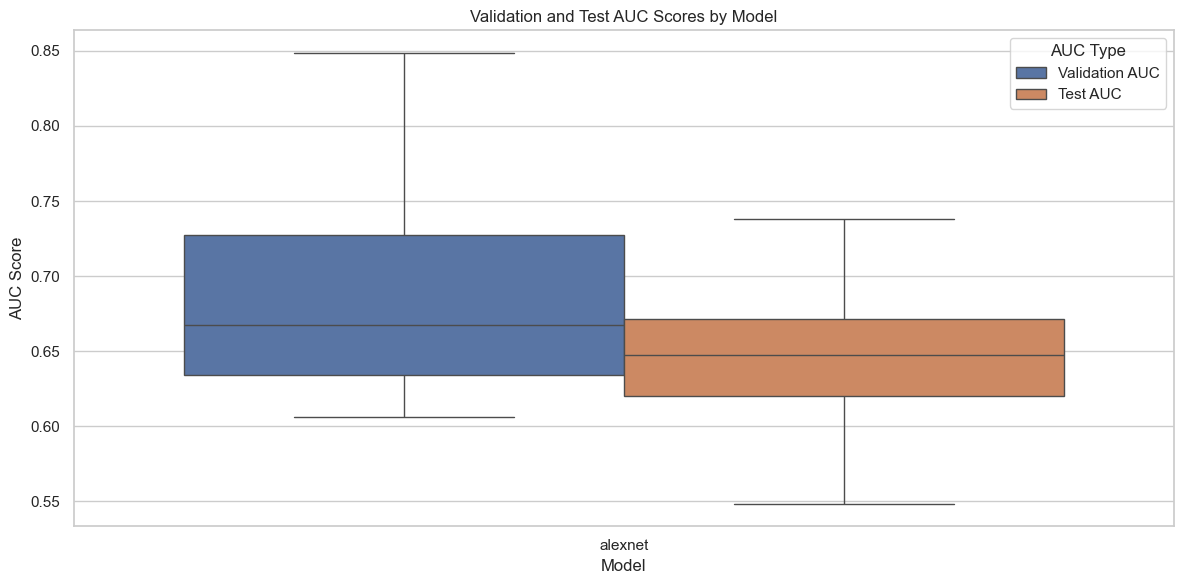

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Melt the DataFrame to have AUC types as a variable
df_melted = df.melt(id_vars=["Model", "Pathology"], 
                    value_vars=["Validation AUC", "Test AUC"],
                    var_name="AUC Type", 
                    value_name="AUC Score")

# Create a boxplot
sns.boxplot(x="Model", y="AUC Score", hue="AUC Type", data=df_melted)

# Add title and labels
plt.title("Validation and Test AUC Scores by Model")
plt.xlabel("Model")
plt.ylabel("AUC Score")
plt.legend(title="AUC Type")

# Show the plot
plt.tight_layout()
plt.show()